In [47]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv("marketing_campaign.xls",sep='\t')
data.Dt_Customer = pd.to_datetime(data.Dt_Customer,format="%d-%m-%Y")
data.insert(2,"Age",2024-data.Year_Birth)
data["Marital_Status"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data = data.dropna()
data.insert(6,"Spent",data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"])
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0


(array([ 10.,  18.,  33.,  58.,  68.,  70.,  85.,  77., 129., 141., 152.,
        150., 161., 121.,  94., 115., 123.,  99.,  93., 103.,  84.,  94.,
         59.,  37.,  24.,  13.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   1.]),
 array([ 28.  ,  30.06,  32.12,  34.18,  36.24,  38.3 ,  40.36,  42.42,
         44.48,  46.54,  48.6 ,  50.66,  52.72,  54.78,  56.84,  58.9 ,
         60.96,  63.02,  65.08,  67.14,  69.2 ,  71.26,  73.32,  75.38,
         77.44,  79.5 ,  81.56,  83.62,  85.68,  87.74,  89.8 ,  91.86,
         93.92,  95.98,  98.04, 100.1 , 102.16, 104.22, 106.28, 108.34,
        110.4 , 112.46, 114.52, 116.58, 118.64, 120.7 , 122.76, 124.82,
        126.88, 128.94, 131.  ]),
 <BarContainer object of 50 artists>)

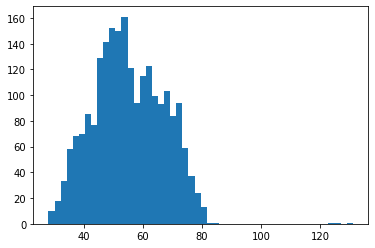

In [49]:
plt.hist(data.Age,bins=50)

In [50]:
data = data[data.Age < 100]

In [51]:
mean_age = data.Age.mean()
median_age = data.Age.median()
std_age = data.Age.std()
print("Media: " + str(mean_age))
print("Mediana: " + str(median_age))
print("Standard deviation: " + str(std_age))

Media: 55.082693176683236
Mediana: 54.0
Standard deviation: 11.70021612968385


(array([ 24.,  28., 101., 175., 220., 233., 224., 210., 206., 231., 199.,
        190., 108.,  43.,   8.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1730.  ,   8379.36,  15028.72,  21678.08,  28327.44,  34976.8 ,
         41626.16,  48275.52,  54924.88,  61574.24,  68223.6 ,  74872.96,
         81522.32,  88171.68,  94821.04, 101470.4 , 108119.76, 114769.12,
        121418.48, 128067.84, 134717.2 , 141366.56, 148015.92, 154665.28,
        161314.64, 167

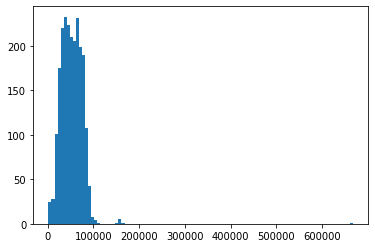

In [52]:
plt.hist(data.Income,bins=100)

In [53]:
data = data[data.Income < 600000]

In [54]:
mean_income = data.Income.mean()
median_income = data.Income.median()
std_income = data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 51958.81057866185
Mediana: 51371.0
Standard deviation: 21527.278844050485


In [59]:
counts = data.Education.value_counts()
print(counts)

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64
